# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1rcxnQuLqFyn8l9hQmdyp-yxSaXhxJPed"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Predict Defects Using Deep Learning 
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=167bsDXj2H_FqryEhoe6MrLAbt-d6Os-y)

![alt text](https://drive.google.com/uc?id=1dyo4nu8qObw_5-vrgasvWtX6WIdqkS86)

![alt text](https://drive.google.com/uc?id=1nzRA5KU0eWo0YPZtSxUWOoMlvooKGCkt)

![alt text](https://drive.google.com/uc?id=1hL6DnHp9Jn0oJSM2guGiEkxKGkuRcxjL)

![alt text](https://drive.google.com/uc?id=1iqFkF-zkWXj1hIhcc9Y-bs-7-HocSuYz)

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
import os
sns.set()


![alt text](https://drive.google.com/uc?id=1kNILYpkePWnvy4Ntfsgorm55AzexCyay)

![alt text](https://drive.google.com/uc?id=1hMEbHCAHE3rsfHA6fR-ELY6c9dkJuAJI)

In [2]:
defect_class_mask_df = pd.read_csv('train.csv')

In [3]:
defect_class_mask_df

,ImageId,ClassId,EncodedPixels
0,d2291de5c.jpg,1,147963 3 148213 9 148461 18 148711 24 148965 2...
1,78416c3d0.jpg,3,54365 3 54621 7 54877 10 55133 12 55388 14 556...
2,2283f2183.jpg,3,201217 43 201473 128 201729 213 201985 5086 20...
3,f0dc068a8.jpg,3,159207 26 159412 77 159617 128 159822 179 1600...
4,00d639396.jpg,3,229356 17 229595 34 229850 36 230105 37 230360...
...,...,...,...
5743,c12842f5e.jpg,3,88 23 342 29 596 34 850 39 1105 44 1361 46 161...
5744,2222a03b3.jpg,3,63332 4 63587 11 63841 20 64096 27 64351 35 64...
5745,b43ea2c01.jpg,1,185024 7 185279 11 185535 12 185790 13 186045 ...
5746,1bc37a6f4.jpg,3,303867 1 304122 3 304376 6 304613 3 304630 9 3...


In [4]:
all_images_df = pd.read_csv('defect_and_no_defect.csv')

In [5]:
all_images_df

,ImageID,label
0,0002cc93b.jpg,1
1,0007a71bf.jpg,1
2,000a4bcdd.jpg,1
3,000f6bf48.jpg,1
4,0014fce06.jpg,1
...,...,...
12992,0482ee1d6.jpg,0
12993,04802a6c2.jpg,0
12994,03ae2bc91.jpg,0
12995,04238d7e3.jpg,0


# TASK #3: VISUALIZE AND EXPLORE DATASET

In [6]:
defect_class_mask_df['mask'] = defect_class_mask_df.ClassId.map(lambda x:1)
defect_class_mask_df.head(50)

,ImageId,ClassId,EncodedPixels,mask
0,d2291de5c.jpg,1,147963 3 148213 9 148461 18 148711 24 148965 2...,1
1,78416c3d0.jpg,3,54365 3 54621 7 54877 10 55133 12 55388 14 556...,1
2,2283f2183.jpg,3,201217 43 201473 128 201729 213 201985 5086 20...,1
3,f0dc068a8.jpg,3,159207 26 159412 77 159617 128 159822 179 1600...,1
4,00d639396.jpg,3,229356 17 229595 34 229850 36 230105 37 230360...,1
5,17d02873a.jpg,3,254980 43 255236 127 255492 211 255748 253 256...,1
6,47b5ab1bd.jpg,3,128976 8 129230 12 129484 16 129739 23 129995 ...,1
7,a6ecee828.jpg,3,179011 27 179126 73 179259 39 179375 80 179497...,1
8,11aaf18e2.jpg,3,303235 2 303489 7 303743 9 303997 11 304181 2 ...,1
9,cdf669a1f.jpg,4,310246 11 310499 25 310753 28 311007 31 311262...,1


Text(0.5, 1.0, 'Número de imagenes por clase')

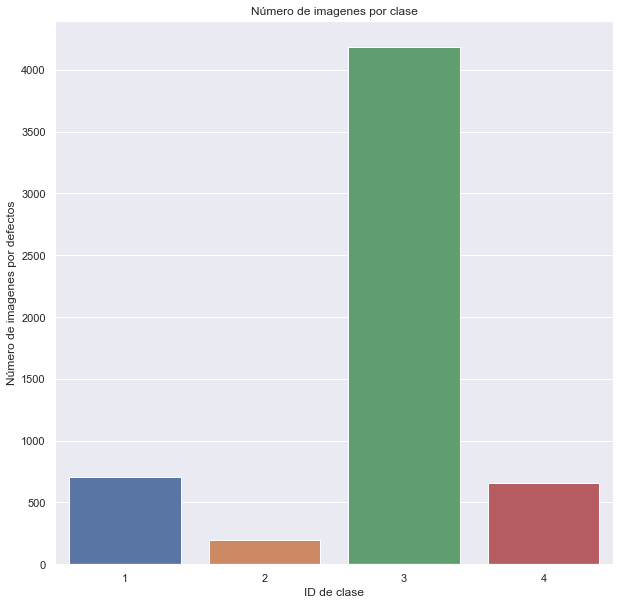

In [7]:
plt.figure(figsize=(10,10))
sns.countplot(x=defect_class_mask_df.ClassId)
plt.ylabel('Número de imagenes por defectos')
plt.xlabel('ID de clase')
plt.title('Número de imagenes por clase')

In [8]:
defect_type = defect_class_mask_df.groupby(['ImageId'])['mask'].sum()
defect_type

ImageId
0002cc93b.jpg    1
0007a71bf.jpg    1
000a4bcdd.jpg    1
000f6bf48.jpg    1
0014fce06.jpg    1
                ..
ffcf72ecf.jpg    1
fff02e9c5.jpg    1
fffe98443.jpg    1
ffff4eaa8.jpg    1
ffffd67df.jpg    1
Name: mask, Length: 5474, dtype: int64

In [9]:
defect_type.value_counts()

1    5201
2     272
3       1
Name: mask, dtype: int64

Text(0.5, 1.0, 'Número de defectos en la imagen')

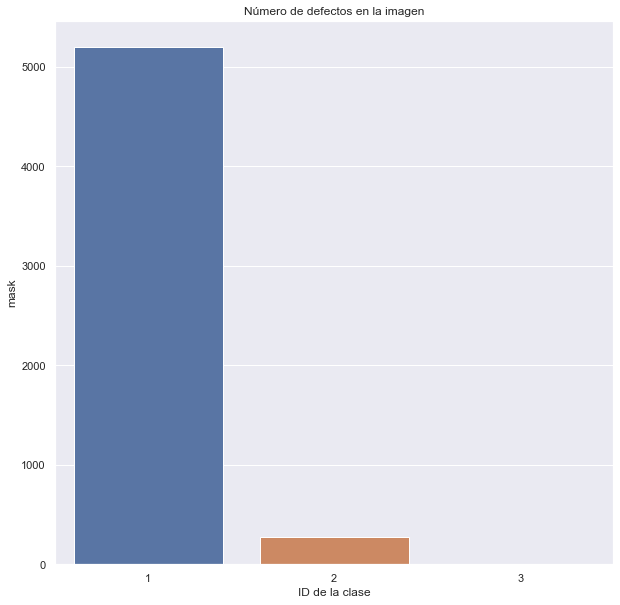

In [10]:
plt.figure(figsize=(10,10))
sns.barplot(x = defect_type.value_counts().index,y =defect_type.value_counts())
plt.xlabel('ID de la clase')
plt.title('Número de defectos en la imagen')

In [11]:
defect_class_mask_df.shape

(5748, 4)

In [12]:
all_images_df.shape

(12997, 2)

In [13]:
all_images_df.value_counts()

ImageID        label
ef24da2ba.jpg  1        3
db4867ee8.jpg  1        3
7f30b9c64.jpg  1        2
3b8d1d356.jpg  1        2
286f459e6.jpg  1        2
                       ..
566401013.jpg  0        1
56774fb7f.jpg  1        1
567e1f981.jpg  1        1
568439b6c.jpg  1        1
ffffd67df.jpg  1        1
Length: 12568, dtype: int64

Text(0.5, 1.0, 'Imagenes sin defectos y con defectos')

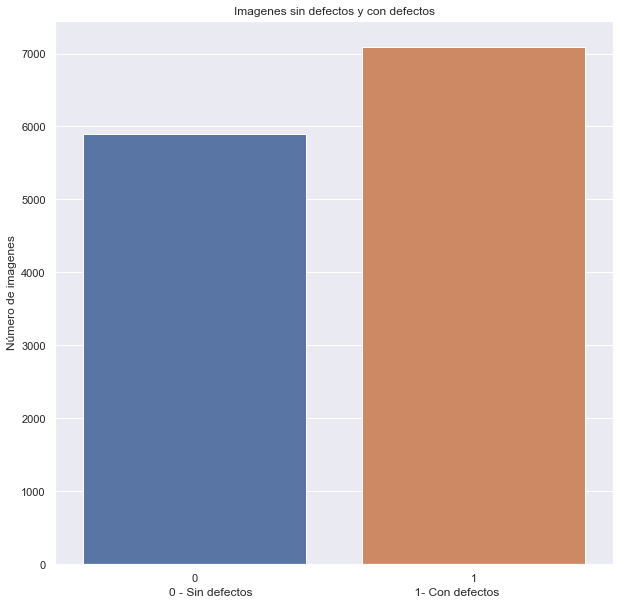

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(x=all_images_df.label.value_counts().index,y = all_images_df.label.value_counts())
plt.ylabel('Número de imagenes')
plt.xlabel('0 - Sin defectos                                                1- Con defectos')
plt.title('Imagenes sin defectos y con defectos')

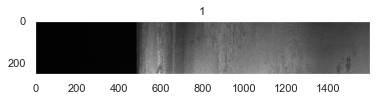

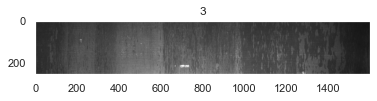

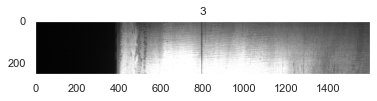

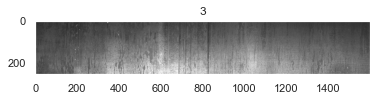

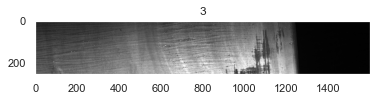

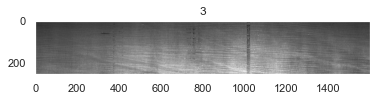

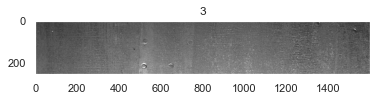

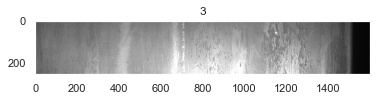

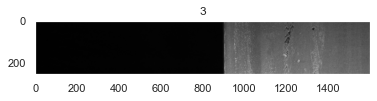

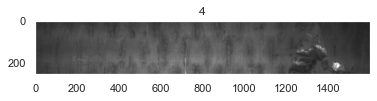

In [15]:
train_dir = 'train_images'

for i in range(10):
    img = io.imread(os.path.join(train_dir,defect_class_mask_df.ImageId[i]))
    plt.figure()
    plt.grid(False)
    plt.title(defect_class_mask_df.ClassId[i])
    plt.imshow(img)

In [16]:
from utilities import rle2mask, mask2rle
train_dir = 'train_images'

In [17]:
image_index = 20 #20 30
mask = rle2mask(defect_class_mask_df.EncodedPixels[image_index], img.shape[0], img.shape[1])
mask.shape

(256, 1600)

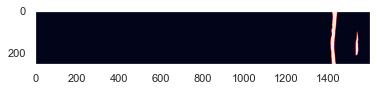

In [18]:
plt.grid(False)
plt.imshow(mask)

(256, 1600, 3)

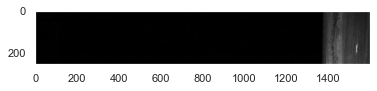

In [19]:
img = io.imread(os.path.join(train_dir,defect_class_mask_df.ImageId[image_index]))
plt.grid(False)
plt.imshow(img)
img.shape

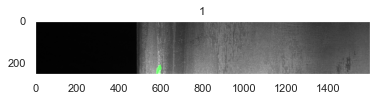

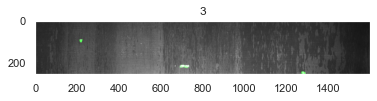

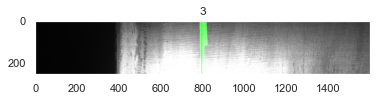

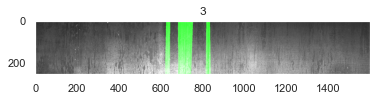

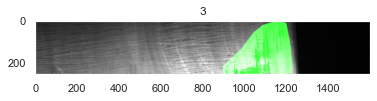

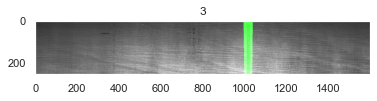

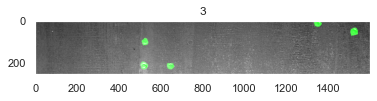

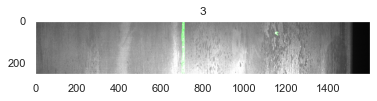

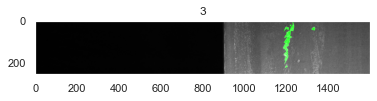

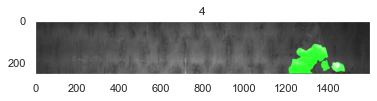

In [20]:
for i in range(10):
    img = io.imread(os.path.join(train_dir,defect_class_mask_df.ImageId[i]))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    mask = rle2mask(defect_class_mask_df.EncodedPixels[i], img.shape[0], img.shape[1])

    img[mask == 1,1] = 255
    plt.figure()
    plt.grid(False)
    plt.imshow(img)
    plt.title(defect_class_mask_df.ClassId[i])

# TASK #4: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS, RESNETS, AND TRANSFER LEARNING

![alt text](https://drive.google.com/uc?id=1HD2FFDD8fonGMyHARfw8ZqaofP3Udek6)

![alt text](https://drive.google.com/uc?id=1-HAo3xcPKGoH-gG8495p12o33nUC1j6W)

![alt text](https://drive.google.com/uc?id=1NlnzDKgTts_9mXkGU3CkrB9SSeBS2GYE)

![alt text](https://drive.google.com/uc?id=1zmzg777lS1PGkTyJXA5fPmrJ9mcKneDi)

![alt text](https://drive.google.com/uc?id=1Fd6xV3NwRAhRdFQN9FDjkumynoqcWCzM)

# TASK #5: BUILD AND TRAIN A DEEP LEARNING MODEL TO DETECT WHETHER A DEFECT IS PRESENT IN AN IMAGE OR NOT

In [21]:
all_images_df.head()

,ImageID,label
0,0002cc93b.jpg,1
1,0007a71bf.jpg,1
2,000a4bcdd.jpg,1
3,000f6bf48.jpg,1
4,0014fce06.jpg,1


In [22]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(all_images_df,test_size=0.15)

In [23]:
train.shape

(11047, 2)

In [24]:
test.shape

(1950, 2)

In [25]:
train_dir = 'train_images'

In [26]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255.,validation_split=0.15)
train_generator = datagen.flow_from_dataframe(
    dataframe=train,
    directory= train_dir,
    x_col= 'ImageID',
    y_col= 'label',
    subset= 'training',
    batch_size=16,
    shuffle=True,
    class_mode='other',
    target_size=(256,256)
)

valid_generator = datagen.flow_from_dataframe(
    dataframe=train,
    directory= train_dir,
    x_col= 'ImageID',
    y_col= 'label',
    subset= 'validation',
    batch_size=16,
    shuffle=True,
    class_mode='other',
    target_size=(256,256)
)


--- Logging error ---
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\logging\__init__.py", line 1083, in emit
    msg = self.format(record)
  File "C:\ProgramData\Anaconda3\lib\logging\__init__.py", line 927, in format
    return fmt.format(record)
  File "C:\ProgramData\Anaconda3\lib\logging\__init__.py", line 663, in format
    record.message = record.getMessage()
  File "C:\ProgramData\Anaconda3\lib\logging\__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\a

Found 9390 validated image filenames.


--- Logging error ---
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\logging\__init__.py", line 1083, in emit
    msg = self.format(record)
  File "C:\ProgramData\Anaconda3\lib\logging\__init__.py", line 927, in format
    return fmt.format(record)
  File "C:\ProgramData\Anaconda3\lib\logging\__init__.py", line 663, in format
    record.message = record.getMessage()
  File "C:\ProgramData\Anaconda3\lib\logging\__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\a

Found 1657 validated image filenames.


In [27]:
test_datagen = ImageDataGenerator(rescale=1./255.)
test_generator = datagen.flow_from_dataframe(
    dataframe=test,
    directory= train_dir,
    x_col= 'ImageID',
    y_col= None,
    batch_size=16,
    shuffle=False,
    class_mode=None,
    target_size=(256,256)
)

Found 1950 validated image filenames.


In [28]:
basemodel = ResNet50(weights='imagenet', include_top= False, input_tensor=Input(shape=(256,256,3)))

In [29]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [30]:
for layers in basemodel.layers:
    layers.trainable = False

In [31]:
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size=(4,4))(headmodel)
headmodel = Flatten(name='flatten')(headmodel)
headmodel = Dense(256,activation='relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(1,activation='sigmoid')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [32]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Nadam', metrics=['accuracy'])

In [33]:
earlystopping = EarlyStopping(monitor='val_loss',mode='min', verbose=1, patience=20)

checkpointer = ModelCheckpoint(filepath='resnet-weights.hdf5', verbose=1, save_best_only=True)

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n // 16,
    epochs = 40, 
    validation_data = valid_generator,
    validation_steps = valid_generator.n // 16,
    callbacks = [checkpointer, earlystopping]
    )

In [ ]:
model_json = model.to_json()
with open('resnet-classifier-model.json','w') as json_file:
    json_file.write(model_json)

# TASK #6: ASSESS TRAINED MODEL PERFORMANCE

In [34]:
with open('resnet-classifier-model.json','r') as json_file:
    json_saveModel = json_file.read()

model = tf.keras.models.model_from_json(json_saveModel)
model.load_weights('resnet-weights.hdf5')
model.compile(loss = 'binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])

In [35]:
from keras_preprocessing.image import ImageDataGenerator

test_predict = model.predict(test_generator, steps= test_generator.n // 16, verbose = 1)


121/121 [==============================] - 16s 89ms/step


In [36]:
test_predict

array([[0.67035073],
       [0.5126075 ],
       [0.03287309],
       ...,
       [0.6817674 ],
       [0.6817674 ],
       [0.6817674 ]], dtype=float32)

In [37]:
predict = []
for i in test_predict:
    if i < 0.01:
        predict.append(0)
    else :
        predict.append(1)

predict = np.asarray(predict)

In [38]:
original = np.asarray(test.label)[:1936]
len(original)

1936

In [39]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, predict)
accuracy

0.5996900826446281

<AxesSubplot:>

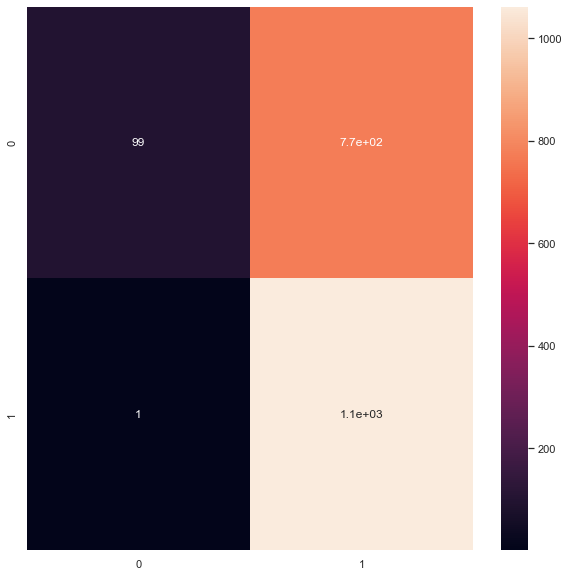

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original,predict)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

In [41]:
from sklearn.metrics import classification_report
report = classification_report(original, predict, labels=[0,1])
print(report)

              precision    recall  f1-score   support

           0       0.99      0.11      0.20       873
           1       0.58      1.00      0.73      1063

    accuracy                           0.60      1936
   macro avg       0.78      0.56      0.47      1936
weighted avg       0.76      0.60      0.49      1936



# TASK #7: UNDERSTAND THE THEORY AND INTUITION BEHIND RESUNET (SEGMENTATION)

![alt text](https://drive.google.com/uc?id=1D7mAjdEFv6cIb4UFiXwndJy6enzZQzpb)

![alt text](https://drive.google.com/uc?id=1TK1Y9gry62NORdA-EjWD8HJadBZMa_sL)

![alt text](https://drive.google.com/uc?id=1vwnusyfXPyO5qYVIr-htXiWWq7OI1-Kj)

![alt text](https://drive.google.com/uc?id=1SaaANhEHpBu_-rmEKWFadnEAQeNrs8-O)

# TASK #8: BUILD A RESUNET SEGMENTATION MODEL

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_val = train_test_split(
    defect_class_mask_df,
    test_size=0.2)

In [43]:
train_ids = list(X_train.ImageId)
train_class = list(X_train.ClassId)
train_rle = list(X_train.EncodedPixels)

val_ids = list(X_val.ImageId)
val_class = list(X_val.ClassId)
val_rle = list(X_val.EncodedPixels)

In [44]:
from utilities import DataGenerator

training_generator = DataGenerator(
    train_ids,
    train_class,
    train_rle,
    train_dir
    )
    
validation_generator = DataGenerator(
    val_ids, 
    val_class, 
    val_rle, 
    train_dir
    )


In [45]:
def resblock(X,f):


    # making a copy of input
    X_copy = X

    # main path
    # Read more about he_normal: https://medium.com/@prateekvishnu/xavier-and-he-normal-he-et-al-initialization-8e3d7a087528
    
    X = Conv2D(
        f,
        kernel_size = (1,1),
        strides = (1,1),
        kernel_initializer='he_normal')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    X = Conv2D(
        f,
        kernel_size=(3,3), 
        strides=(1,1), 
        padding='same', 
        kernel_initializer='he_normal')(X)
    X = BatchNormalization()(X)

    # Short path
    # Read more here: https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33

    X_copy = Conv2D(
        f, 
        kernel_size=(1,1),
        strides = (1,1),
        kernel_initializer='he_normal')(X_copy)
    X_copy = BatchNormalization()(X_copy)

    # Adding the output from main path and short path together

    X = Add()([X,X_copy])
    X = Activation('relu')(X)
    
    return X


In [46]:
def upsample_concat(x,skip):
    x = UpSampling2D((2,2))(x)
    merge = Concatenate()([x, skip])
    return merge

In [47]:
input_shape = (256,256,1)

#Input tensor shape
X_input = Input(input_shape)

#Stage 1
conv1_in = Conv2D(
    16,
    3,
    activation='relu',
    padding='same',
    kernel_initializer='he_normal')(X_input)

conv1_in = BatchNormalization()(conv1_in)

conv1_in = Conv2D(
    16,
    3,
    activation='relu',
    padding='same',
    kernel_initializer='he_normal')(conv1_in)

conv1_in = BatchNormalization()(conv1_in)
pool_1 = MaxPool2D(pool_size = (2,2))(conv1_in)

#Stage 2
conv2_in = resblock(pool_1, 32)
pool_2 = MaxPool2D(pool_size = (2,2))(conv2_in)

#Stage 3
conv3_in = resblock(pool_2, 64)
pool_3 = MaxPool2D(pool_size = (2,2))(conv3_in)

#Stage 4
conv4_in = resblock(pool_3, 128)
pool_4 = MaxPool2D(pool_size = (2,2))(conv4_in)

#Stage 5
conv5_in = resblock(pool_4, 256)

#Upscale stage 1
up_1 = upsample_concat(conv5_in, conv4_in)
up_1 = resblock(up_1, 128)

#Upscale stage 2
up_2 = upsample_concat(up_1, conv3_in)
up_2 = resblock(up_2, 64)

#Upscale stage 3
up_3 = upsample_concat(up_2, conv2_in)
up_3 = resblock(up_3, 32)

#Upscale stage 4
up_4 = upsample_concat(up_3, conv1_in)
up_4 = resblock(up_4, 16)

#Final Output
output = Conv2D(
    4,
    (1,1),
    padding='same',
    activation='sigmoid')(up_4)

model_seg = Model(inputs = X_input, outputs = output)

## Loss function:
 
We need a custom loss function to train this ResUNet.So,  we have used the loss function as it is from https://github.com/nabsabraham/focal-tversky-unet/blob/master/losses.py


@article{focal-unet,
  title={A novel Focal Tversky loss function with improved Attention U-Net for lesion segmentation},
  author={Abraham, Nabila and Khan, Naimul Mefraz},
  journal={arXiv preprint arXiv:1810.07842},
  year={2018}
}

In [48]:
from utilities import focal_tversky, tversky_loss, tversky

In [49]:
adam = tf.keras.optimizers.Adam(
    learning_rate = 0.05, 
    epsilon=0.1)

model_seg.compile(
    optimizer = adam,
    loss=focal_tversky, 
    metrics=[tversky])

In [50]:
earlystopping = EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=20)

checkpointer = ModelCheckpoint(
    filepath='resunet-segmentation.weights.hdf5',
    verbose=1,
    save_best_only=True)

In [51]:
history = model_seg.fit_generator(
    training_generator, 
    epochs = 40, 
    validation_data = validation_generator,
    callbacks = [checkpointer, earlystopping]
    )

C:\Users\chris\AppData\Local\Temp/ipykernel_24160/2741499615.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_seg.fit_generator(


Epoch 1/40
287/287 [==============================] - ETA: 0s - loss: 0.9483 - tversky: 0.0683
Epoch 1: val_loss improved from inf to 0.92483, saving model to resunet-segmentation.weights.hdf5
287/287 [==============================] - 158s 540ms/step - loss: 0.9483 - tversky: 0.0683 - val_loss: 0.9248 - val_tversky: 0.0987
Epoch 2/40
287/287 [==============================] - ETA: 0s - loss: 0.7957 - tversky: 0.2596
Epoch 2: val_loss improved from 0.92483 to 0.73331, saving model to resunet-segmentation.weights.hdf5
287/287 [==============================] - 73s 254ms/step - loss: 0.7957 - tversky: 0.2596 - val_loss: 0.7333 - val_tversky: 0.3360
Epoch 3/40
287/287 [==============================] - ETA: 0s - loss: 0.6492 - tversky: 0.4359
Epoch 3: val_loss improved from 0.73331 to 0.68419, saving model to resunet-segmentation.weights.hdf5
287/287 [==============================] - 66s 230ms/step - loss: 0.6492 - tversky: 0.4359 - val_loss: 0.6842 - val_tversky: 0.3958
Epoch 4/40
287/2

In [52]:
model_json = model_seg.to_json()
with open("resunet-segmentation-model.json","w") as json_file:
  json_file.write(model_json)

# TASK #9: ASSESS TRAINED SEGMENTATION MODEL PERFORMANCE

In [ ]:
from utilities import focal_tversky, tversky_loss, tversky

with open('resunet-segmentation-model.json', 'r') as json_file:
    json_savedModel= json_file.read()

# load the model  
model_seg = tf.keras.models.model_from_json(json_savedModel)
model_seg.load_weights('weights_seg.hdf5')
adam = tf.keras.optimizers.Adam(lr = 0.05, epsilon = 0.1)
model_seg.compile(optimizer = adam, loss = focal_tversky, metrics = [tversky])

In [53]:
# data containing test images for segmentation task 
test_df = pd.read_csv('test.csv')

In [54]:
test_df

,ImageId,ClassId,EncodedPixels
0,0ca915b9f.jpg,3,188383 3 188637 5 188892 6 189148 5 189403 6 1...
1,7773445b7.jpg,3,75789 33 76045 97 76300 135 76556 143 76811 15...
2,5e0744d4b.jpg,3,120323 91 120579 182 120835 181 121091 181 121...
3,6ccde604d.jpg,3,295905 32 296098 95 296290 159 296483 222 2967...
4,16aabaf79.jpg,1,352959 24 353211 28 353465 31 353719 33 353973...
...,...,...,...
633,a4334d7da.jpg,4,11829 7 12073 20 12317 32 12566 40 12821 41 13...
634,418e47222.jpg,3,46340 43 46596 127 46852 211 47108 253 47364 2...
635,817a545aa.jpg,3,206529 64 206657 4518 211201 179 211457 128 21...
636,caad490a5.jpg,3,59631 10 59867 30 60103 50 60339 69 60585 79 6...


In [55]:
test_df.ImageId

0      0ca915b9f.jpg
1      7773445b7.jpg
2      5e0744d4b.jpg
3      6ccde604d.jpg
4      16aabaf79.jpg
           ...      
633    a4334d7da.jpg
634    418e47222.jpg
635    817a545aa.jpg
636    caad490a5.jpg
637    a5e9195b6.jpg
Name: ImageId, Length: 638, dtype: object

In [56]:
from utilities import prediction

# make prediction
image_id, defect_type, mask = prediction(test_df, model, model_seg)

In [57]:
# create a dataframe for the result
df_pred= pd.DataFrame({'ImageId': image_id,'EncodedPixels': mask,'ClassId': defect_type})
df_pred.head()

,ImageId,EncodedPixels,ClassId
0,0ca915b9f.jpg,180159 13 180415 13 180671 13 180927 13 181183...,3
1,7773445b7.jpg,10540 1 10796 1 11052 1 11308 1 11564 1 11820 ...,3
2,5e0744d4b.jpg,53624 7 53880 7 54136 7 54392 7 54648 7 54904 ...,3
3,6ccde604d.jpg,292270 54 292526 54 292782 54 293038 54 293294...,3
4,16aabaf79.jpg,63241 6 63497 6 63753 6 64009 6 64265 6 64521 ...,3


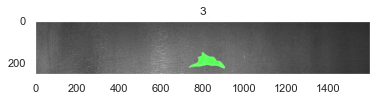

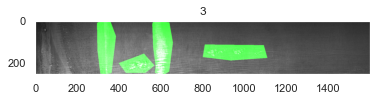

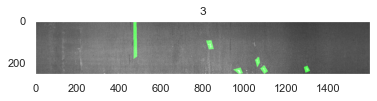

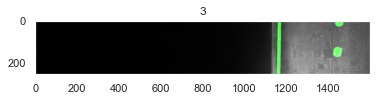

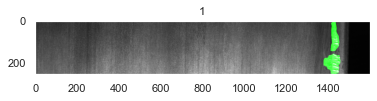

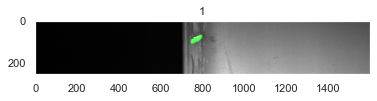

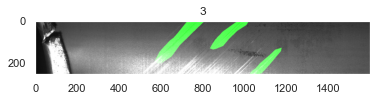

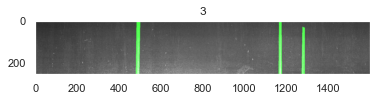

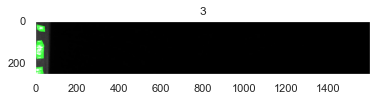

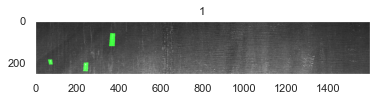

In [60]:
# Let's show the images along with their original (ground truth) masks
for i in range(10):

  # read the images using opencv and convert them to rgb format
  img = io.imread(os.path.join(train_dir,test_df.ImageId[i]))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Obtain mask for the image from rle
  mask = rle2mask(test_df.EncodedPixels[i],img.shape[0],img.shape[1])

  img[mask == 1,1] = 255
  plt.figure()
  plt.grid(False)
  plt.title(test_df.ClassId[i])
  plt.imshow(img)

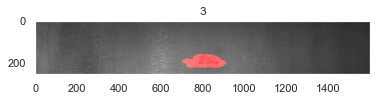

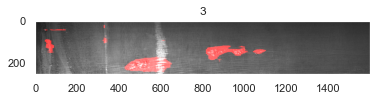

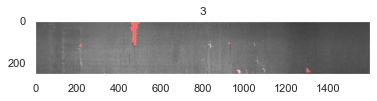

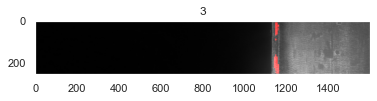

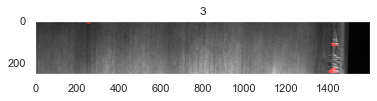

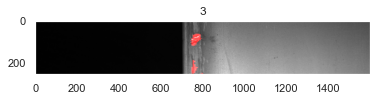

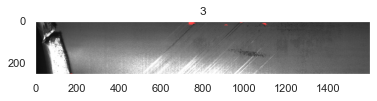

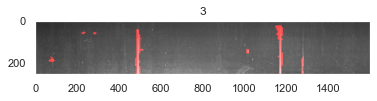

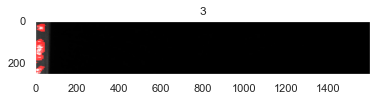

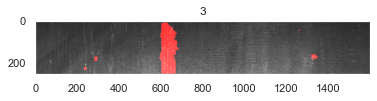

In [61]:
# visualize the results (model predictions)

directory = "train_images"

for i in range(10):

  # read the images using opencv and convert to rgb format
  img = io.imread(os.path.join(directory,df_pred.ImageId[i]))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # get the mask for the image from rle
  mask = rle2mask(df_pred.EncodedPixels[i],img.shape[0],img.shape[1])
  
  img[mask == 1,0] = 255
  plt.figure()
  plt.grid(False)
  plt.title(df_pred.ClassId[i])
  plt.imshow(img)

# EXCELLENT JOB! 